# Tacademy - (1). Python을 활용한 데이터분석 실습

### 1. 강남 출근길에 정자_판교 내릴 사람 예측하기

* EDA : 쌓여 있는 데이터를 기반으로 가설을 세워 데이터를 분석하는 방법<br>

    * 수집 --> 탐색/정제 --> 모델링 --> 결과 <br>
    
    * Missing value --> default 처리 / drop / KNN input 등등... <br>
   
    (Feature Distribution Plot?? / Column Value Validation??) <br>
        
        
* CDA : 목적을 가지고 데이터를 수집하고 분석하는 방법


----------------------------------------------------------------------------

+ Correlation 
    + 상관계수측정을 위해 categorical data -> number type 변환
    + categorical value --> label encoding --> one hot encoding(binary) 
    --> correlation matrix --> clustering by correlation <br>

(Bivariate Distribution Plot??)

----------------------------------------------------------------------------

+ Modeling <br>
    + Modeling Overview : feature / classfication or regression / imbalanced data / data 건수 <br>
    
    + Model baseline : data의 특성에 따라
    
    + dataset 분리 : trainset / testset
    
    + Classification algorithm : <br>
        Tree - Decision / randomforest / gradient boosting <br>
        Regression - Logistic <br>
        SVM - SVC <br>
        KNN - KNeighbors classifier <br>
        Bayesian - Multinomial NB <br>
        Neural Network - MLPClassifier <br>
                                 
    + Featur Importances --> RF에서 불순도 감소분으로 각 Feature들의 중요도를 가늠 --> 변수 선택으로도 사용가능
    
----------------------------------------------------------------------------

- Metric (Confusion Matrix)
    - Precision / Recall
    

### 2. 설문 조사 데이터 탐색

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


%cd C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\tacademy\1. python_eda

pd.options.display.max_rows = 10
%matplotlib inline

C:\Users\hanbum\Desktop\2018\work\2. Project\3. Personal\tacademy\1. python_eda


In [5]:
#load data

survey = pd.read_csv('class-survey-sample.csv',encoding='utf-8')
survey.head()

,타임스탬프,닉네임,직업,성별,나이,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류,사는곳,전공,실습환경OS
0,2017. 10. 16 오전 5:57:16,닉1,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
1,2017. 10. 16 오전 5:57:16,닉2,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
2,2017. 10. 16 오전 5:57:16,닉3,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
3,2017. 10. 16 오전 5:57:16,닉4,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
4,2017. 10. 16 오전 5:57:16,닉5,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS


In [6]:
#basic information check
print(survey.index)
print(survey.columns)

RangeIndex(start=0, stop=43, step=1)
Index(['타임스탬프', '닉네임', '직업', '성별', '나이', '복장', '상의옷색상', '하의옷색상', '하의옷종류',
       '신발색상', '신발종류', '사는곳', '전공', '실습환경OS'],
      dtype='object')


In [7]:
#변수별로 unique value 찾기
column_list = list(set(survey))
   
for i in range(14):
    print(survey[column_list[i]].unique())

['남' '여']
['흰색' '노랑' '검정' '회색' '파랑']
['컴공' '정보통신' '통계' '경영' '회계' '마켓팅']
['강남' '강북' '강동' '강서' '경기남부' '경기북부' '경기동부' '경기서부']
['맥OS' '윈도우OS']
['대학생' '대학원생' '예비 스타트업' '재직자' '취업준비생']
['흰색' '검정' '파랑' '빨강']
[20 25 30 35 40]
['흰색' '노랑' '검정' '회색' '파랑' '주황']
['청바지' '치마' '면바지' '반바지']
['평상복' '캐주얼' '정장']
['닉1' '닉2' '닉3' '닉4' '닉5' '닉6' '닉7' '닉8' '닉9' '닉10' '닉11' '닉12' '닉13' '닉14'
 '닉15' '닉16' '닉17' '닉18' '닉19' '닉20' '닉21' '닉22' '닉23' '닉24' '닉25' '닉26'
 '닉27' '닉28' '닉29' '닉30' '닉31' '닉32' '닉33' '닉34' '닉35' '닉36' '닉37' '닉38'
 '닉39' '닉40' '닉41' '닉42' '닉43']
['구두' '런닝화' '농구화' '단화']
['2017. 10. 16 오전 5:57:16']


In [8]:
# unique value 개수 세기

for i in range(14):
    print(survey[column_list[i]].value_counts())

남    33
여    10
Name: 성별, dtype: int64
파랑    11
노랑     9
검정     9
회색     8
흰색     6
Name: 하의옷색상, dtype: int64
통계      14
컴공      10
정보통신     7
경영       6
마켓팅      4
회계       2
Name: 전공, dtype: int64
강남      8
경기남부    8
강동      7
강서      6
강북      6
경기북부    4
경기동부    2
경기서부    2
Name: 사는곳, dtype: int64
맥OS      23
윈도우OS    20
Name: 실습환경OS, dtype: int64
취업준비생      19
대학생        18
대학원생        3
재직자         2
예비 스타트업     1
Name: 직업, dtype: int64
흰색    23
검정    10
파랑     8
빨강     2
Name: 신발색상, dtype: int64
20    11
30    10
25    10
40     6
35     6
Name: 나이, dtype: int64
흰색    10
회색    10
노랑     6
파랑     6
검정     6
주황     5
Name: 상의옷색상, dtype: int64
청바지    30
면바지     6
반바지     4
치마      3
Name: 하의옷종류, dtype: int64
평상복    29
캐주얼     8
정장      6
Name: 복장, dtype: int64
닉16    1
닉29    1
닉35    1
닉26    1
닉6     1
      ..
닉33    1
닉8     1
닉5     1
닉4     1
닉20    1
Name: 닉네임, Length: 43, dtype: int64
런닝화    26
구두      7
농구화     6
단화      4
Name: 신발종류, dtype: int64
2017. 10. 16 오전 5:57:16  

In [9]:
# Clustering 
# (1). Variable selection 

feature_name = ['닉네임', '복장','상의옷색상','하의옷색상','하의옷종류','신발색상','신발종류']
survey_hc = survey[feature_name]

In [10]:
survey_hc.set_index('닉네임', inplace = True)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict

In [12]:
# (2). label encoding
le_enc_dict = defaultdict(LabelEncoder)
le_feature = survey_hc.apply(lambda x : le_enc_dict[x.name].fit_transform(x))

In [13]:
le_feature.head()

,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류
닉네임,,,,,,
닉1,2,5,4,2,3,0
닉2,2,5,4,2,3,0
닉3,2,5,1,2,3,0
닉4,2,5,1,2,3,0
닉5,2,5,4,2,3,0


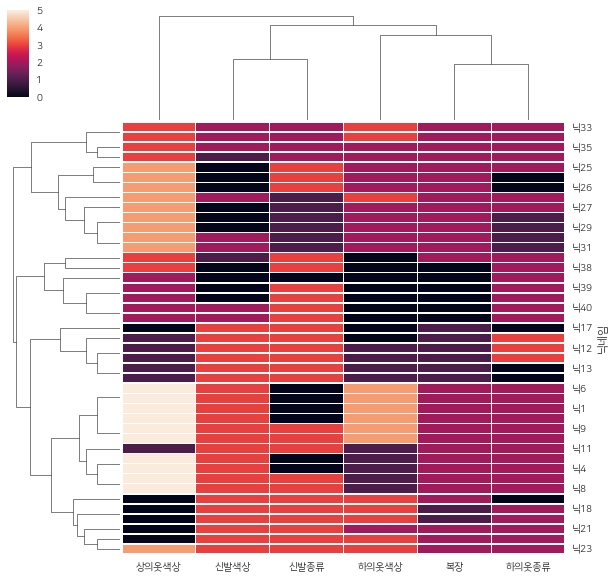

In [17]:
# hierarchical clustering 적용

sns.set(style ='whitegrid', font_scale=1, font='NanumSquare')
g = sns.clustermap(le_feature,metric='jaccard', linewidths=.5)

### 유사도

+ 